In [12]:
import netCDF4 as nc
from metpy.plots import USCOUNTIES
import metpy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

c:\Users\tonyi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
file = nc.Dataset("C:\\Users\\tonyi\\Desktop\\wrfout_d02_2019-07-20_03_00_00")

In [5]:
file.variables.keys()

dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'BATHYMETRY_FLAG', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'AREA2D', 'DX2D', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'QNICE', 'QNSNOW', 'QNRAIN', 'QNGRAUPEL', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'WATER_DEPTH', 'COSZEN', 'LAI', 'U10E', 'V10E', 'QKE', 'NUPDRAFT', 'KTOP_PLUME', 'MAXMF', 'DTAUX3D', 'DTAUY3D', 'DUSFCG', 'DVSFCG', 'VAR', 'CON', 'OA1', 'OA2', 'OA3', 'OA4', 'OL1', 'OL2', 'OL3', 'OL4', 

In [9]:
ref = file.variables["REFL_10CM"]


<class 'netCDF4._netCDF4.Variable'>
float32 REFL_10CM(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: Radar reflectivity (lamda = 10 cm)
    units: dBZ
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (1, 44, 270, 270)
filling on, default _FillValue of 9.969209968386869e+36 used

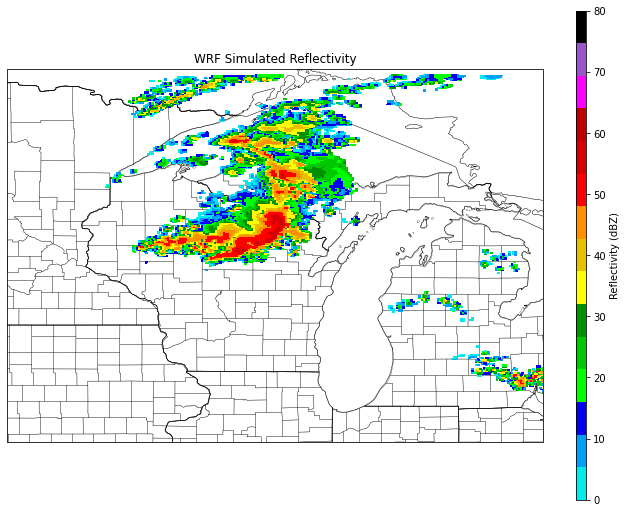

In [41]:
data = ref[0, 0, :, :]  
data = np.where(data < 1, np.nan, data)


x = file.variables['XLONG'][0, :, :]
y = file.variables['XLAT'][0, :, :]
time = file.variables['XTIME']

fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-94.5, -83, 41, 49])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(USCOUNTIES.with_scale('5m'), linewidth=0.25)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

c = ax.pcolormesh(x, y, data, cmap=metpy.plots.ctables.registry.get_colortable('NWSReflectivity'), vmin=0, vmax=80)
fig.colorbar(c, ax=ax, label='Reflectivity (dBZ)', aspect=50)

#plt.title('WRF Simulated Reflectivity (dBZ) {}'.format(time))
plt.title('WRF Simulated Reflectivity')
plt.show()